In [31]:
import os

In [32]:
SegDir = "C:/Users/Rishabh/Downloads/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023 (1)/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023"

In [33]:
os.listdir(SegDir)

['.DS_Store',
 'Vestibular-Schwannoma-MC-RC_NIfTI-segmentation-info3.csv',
 'VS-MC-RC segmentations-NIfTI-Release 2023']

In [34]:
segemntsdir = os.path.join(SegDir,'VS-MC-RC segmentations-NIfTI-Release 2023')
referenceCSV = os.path.join(SegDir,'Vestibular-Schwannoma-MC-RC_NIfTI-segmentation-info3.csv')

In [35]:
DataDir = "C:/Users/Rishabh/Desktop/manifest-1737618971120"

In [36]:
os.listdir(DataDir)

['metadata.csv', 'Vestibular-Schwannoma-MC-RC']

In [37]:
Vestibular_Schwannoma_MC_RC = os.path.join(DataDir,'Vestibular-Schwannoma-MC-RC')
metadata = os.path.join(DataDir, 'metadata.csv')

In [38]:
import pandas as pd
import numpy as np

# Load CSV file
dfmeta = pd.read_csv(metadata)

# Display first few rows
DataSeriesUIDs = np.array(dfmeta['Series UID'].tolist())
print(len(DataSeriesUIDs))
print(len(np.unique(DataSeriesUIDs)))

354
354


In [39]:
import pandas as pd

# Load CSV file
dfseg = pd.read_csv(referenceCSV)

# Display first few rows
# dfseg['series_instance_uid'].tolist()

SegSeriesUIDs = np.array(dfseg['series_instance_uid'].tolist())
print(len(SegSeriesUIDs))
print(len(np.unique(SegSeriesUIDs)))

487
487


In [40]:
for val in dfseg['SegmentationPath'].tolist():
    if pd.isna(val):
        continue
    else:
        if val[-9:] == 'T1.nii.gz':
            print(val[-9:])

T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz
T1.nii.gz


In [41]:
commonSeriesUID = []
for UID in DataSeriesUIDs:
    if UID in SegSeriesUIDs:
        commonSeriesUID.append(UID)

In [42]:
commonSeriesUID[15]

np.str_('1.3.6.1.4.1.14519.5.2.1.133576880211952819068063824715824886367')

In [43]:
print(dfmeta[dfmeta['Series UID'] == '1.3.6.1.4.1.14519.5.2.1.10875952303942319530925289292568369177']['File Location'][0][2:])

Vestibular-Schwannoma-MC-RC\VS-MC-RC-001\03-13-1988-NA-t1of3  External Images for PACS-75716\301.000000-T2I.A.C.      T2 TSE-69177


In [44]:
smpl = dfmeta[dfmeta['Series UID'] == '1.3.6.1.4.1.14519.5.2.1.10875952303942319530925289292568369177']['File Location'][0][2:]
smpl = os.path.join(DataDir,smpl)
# os.listdir(smpl)

In [45]:
print(dfseg[dfseg['series_instance_uid'] == '1.3.6.1.4.1.14519.5.2.1.10875952303942319530925289292568369177']['SegmentationPath'].tolist()[0])

VS-MC-RC-001/1988-03-13/seg_T2.nii.gz


In [46]:
smpl = dfseg[dfseg['series_instance_uid'] == '1.3.6.1.4.1.14519.5.2.1.10875952303942319530925289292568369177']['SegmentationPath'].tolist()[0]
os.path.join(segemntsdir, smpl)
# os.listdir()

'C:/Users/Rishabh/Downloads/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023 (1)/VS-MC-RC-Segmentations_with_pathname_spreadsheet-Release2023\\VS-MC-RC segmentations-NIfTI-Release 2023\\VS-MC-RC-001/1988-03-13/seg_T2.nii.gz'

In [47]:
import nibabel as nib

# Load the NIfTI file
nii_image = nib.load(os.path.join(segemntsdir, smpl))

# Get the image data as a NumPy array
image_data = nii_image.get_fdata()

# Print shape of the image data
print(image_data.shape)

(256, 256, 30)


In [48]:
print(np.unique(image_data))

[0. 1.]


In [19]:
cout = 0
for UID in DataSeriesUIDs:
    smpl = dfseg[dfseg['series_instance_uid'] == UID]['SegmentationPath'].tolist()[0]
    # print(smpl)
    if pd.isna(smpl):
        continue
    else:
        smpl = os.path.join(segemntsdir, smpl)
        # print(smpl)
        nii_image = nib.load(smpl)
        image_data = nii_image.get_fdata()
        # print(image_data.shape)
        # print(np.unique(image_data))
        cout = cout + 1

In [20]:
dfmeta.head()

,Series UID,Collection,3rd Party Analysis,Data Description URI,Subject ID,Study UID,Study Description,Study Date,Series Description,Manufacturer,Modality,SOP Class Name,SOP Class UID,Number of Images,File Size,File Location,Download Timestamp
0,1.3.6.1.4.1.14519.5.2.1.1087595230394231953092...,Vestibular-Schwannoma-MC-RC,NO,https://doi.org/10.7937/HRZH2N82,VS-MC-RC-001,1.3.6.1.4.1.14519.5.2.1.3218099382901018613321...,t1of3 External Images for PACS,03-13-1988,T2I.A.C. T2 TSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,30,4.03 MB,.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-001\03-...,2025-01-23T13:26:48.576
1,1.3.6.1.4.1.14519.5.2.1.1453239208794471264817...,Vestibular-Schwannoma-MC-RC,NO,https://doi.org/10.7937/HRZH2N82,VS-MC-RC-001,1.3.6.1.4.1.14519.5.2.1.1889731862903938049840...,t3of3 External Images for PACS,05-16-1990,T2I.A.C. T2 TSE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,35,4.70 MB,.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-001\05-...,2025-01-23T13:26:49.929
2,1.3.6.1.4.1.14519.5.2.1.3274630733450479432859...,Vestibular-Schwannoma-MC-RC,NO,https://doi.org/10.7937/HRZH2N82,VS-MC-RC-002,1.3.6.1.4.1.14519.5.2.1.1481814016291649671957...,t1of3 External Images for PACS,03-07-1987,T1Ax T1 POST GAD,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,10,5.28 MB,.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-002\03-...,2025-01-23T13:26:55.414
3,1.3.6.1.4.1.14519.5.2.1.1472560956213388597691...,Vestibular-Schwannoma-MC-RC,NO,https://doi.org/10.7937/HRZH2N82,VS-MC-RC-001,1.3.6.1.4.1.14519.5.2.1.1741248752533255426497...,t2of3 External Images for PACS,03-24-1989,T2T23DDRIVE,Philips Medical Systems,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,40,9.19 MB,.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-001\03-...,2025-01-23T13:27:03.449
4,1.3.6.1.4.1.14519.5.2.1.1740122581236064856489...,Vestibular-Schwannoma-MC-RC,NO,https://doi.org/10.7937/HRZH2N82,VS-MC-RC-002,1.3.6.1.4.1.14519.5.2.1.1808187277432693109872...,t3of3 External Images for PACS,10-23-1989,T2Reformatted,GE MEDICAL SYSTEMS,MR,MR Image Storage,1.2.840.10008.5.1.4.1.1.4,38,20.05 MB,.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-002\10-...,2025-01-23T13:27:05.165


In [21]:
cout

301

In [77]:
import dicom2nifti
import pydicom
from src.utils.ImageUtils import ModifyImageForDicom, reshape_to_HW_slices
from src.utils.DicomUtils import ImageToDicom,fun, CreateSegForMRI
from src.utils.FileHandlingUtils import FindAllDCMSeries
from src.configuration.config import TempDCMseries, OutputFolder, OutputMRDir, VSmodelURL,CorrectNfityPath
import nibabel as nib
import os

In [64]:
# UID = commonSeriesUID[25]
UID = '1.3.6.1.4.1.14519.5.2.1.246131891374983306857487852233984957828'
# UID = '1.3.6.1.4.1.14519.5.2.1.311251873679098488391157318475172879927'
print(dfmeta[dfmeta['Series UID'] == UID]['File Location'].tolist()[0])
smpl = dfmeta[dfmeta['Series UID'] == UID]['File Location'].tolist()[0][2:]
print(dfseg[dfseg['series_instance_uid'] == UID]['SegmentationPath'].tolist()[0])
smplSeg = dfseg[dfseg['series_instance_uid'] == UID]['SegmentationPath'].tolist()[0]
Path = os.path.join(DataDir,smpl)
GroundSegPath = os.path.join(segemntsdir, smplSeg)
GroundSeg = nib.load(GroundSegPath)
GroundSegdata = GroundSeg.get_fdata()
Correctnii = nib.load(CorrectNfityPath)
OutputFileFolder = 'C:/Users/Rishabh/Documents/DICOMIZER/output'
output_file = os.path.join(OutputFileFolder, 'vs_gk_0000.nii.gz')
# dicom2nifti.dicom_series_to_nifti(Path, output_file, reorient_nifti=False)
dicom2nifti.dicom_series_to_nifti(Path, output_file, reorient_nifti=True)
print(GroundSegdata.shape)

.\Vestibular-Schwannoma-MC-RC\VS-MC-RC-024\08-09-1994-NA-t1of3  MRI Head-73448\19.000000-T1t1tseax2.5mmgad-57828
VS-MC-RC-024/1994-08-09/seg_T1.nii.gz
(320, 320, 15)


In [78]:
Path = r'C:\Users\Rishabh\Downloads\GammaKnife_Rishabh_testData\GammaKnife_Rishabh_testData\GKPFX3707_2 - Copy'
Correctnii = nib.load(CorrectNfityPath)
OutputFileFolder = 'C:/Users/Rishabh/Documents/DICOMIZER/output'
output_file = os.path.join(OutputFileFolder, 'vs_gk_0000.nii.gz')
# dicom2nifti.dicom_series_to_nifti(Path, output_file, reorient_nifti=False)
dicom2nifti.dicom_series_to_nifti(Path, output_file, reorient_nifti=True)

{'NII_FILE': 'C:/Users/Rishabh/Documents/DICOMIZER/output\\vs_gk_0000.nii.gz',
 'NII': <nibabel.nifti1.Nifti1Image at 0x254ac546510>,
 'MAX_SLICE_INCREMENT': np.float64(0.9999967741935485)}

In [79]:
file1 = os.listdir(Path)
file1 = file1[0]
pixelarray = pydicom.dcmread(os.path.join(Path,file1))
pixelarray = pixelarray.pixel_array

In [80]:
import numpy as np
nii_img = nib.load(output_file)
affine = nii_img.affine
data = nii_img.get_fdata()
# data = reshape_to_HW_slices(pixelarray,data)
data = np.array(data, dtype=np.uint16)
nii_img = nib.Nifti1Image(data, Correctnii.affine)
# nii_img = nib.Nifti1Image(data, affine)
nib.save(nii_img, output_file)

In [81]:
VSmodelURL = 'http://182.77.48.121:8000/predict/'

In [82]:
VSmodelURL

'http://182.77.48.121:8000/predict/'

In [69]:
output_file

'C:/Users/Rishabh/Documents/DICOMIZER/output\\vs_gk_0000.nii.gz'

In [83]:
import requests
output_path = os.path.join(OutputFileFolder,"downloaded_file.nii.gz")
file_path = output_file
with open(file_path, "rb") as file:
    # Send the file to the API
    response = requests.post(VSmodelURL, files={"file": file})

    # Check if the request was successful
    if response.status_code == 200:
        # Save the returned file
        with open(output_path, "wb") as output_file:
            output_file.write(response.content)
        print(f"File saved as {output_path}")
    else:
        print(f"Failed to fetch the file. Status code: {response.status_code}")
        print(response.json())  # If the API sends error details

Perd = nib.load(output_path)
Perddata = Perd.get_fdata()

File saved as C:/Users/Rishabh/Documents/DICOMIZER/output\downloaded_file.nii.gz


In [561]:
import numpy as np

GTData = []
# Assuming GroundSegdata is a 3D NumPy array
for i in range(GroundSegdata.shape[2]):  # Loop through all slices along the third axis
    GTData.append(np.rot90(GroundSegdata[:, :, i], k=1))

GTData = np.stack(GTData, axis=2)

In [84]:
import numpy as np

PredData = []

# Assuming GroundSegdata is a 3D NumPy array
for i in range(Perddata.shape[2]):  # Loop through all slices along the third axis
    # Perddata[:, :, i] = Perddata[:, :, i].T  # Rotate each slice 90 degrees
    PredData.append( Perddata[:, :, i].T )

PredData = np.stack(PredData, axis=2)

In [61]:
mask.shape

NameError: name 'mask' is not defined

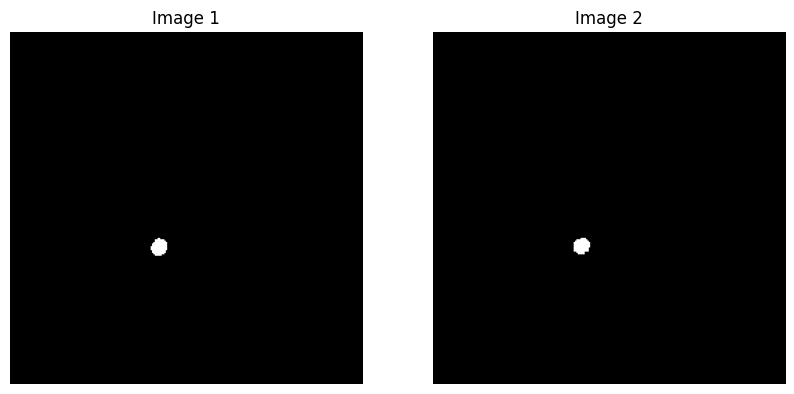

In [568]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size if needed

indx = 19
# print(np.unique(ground_data[:, :, indx]))

t= 0
# Display first image 
axes[0].imshow(GTData[:, :, indx], cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")  # Hide axes


# Display second image
# slice_data = Perddata[:, :, 30-t]
# Perddata = np.rot90(Perddata, k=1) 
axes[1].imshow(PredData[:, :, indx], cmap="gray")  # Change the index as needed
axes[1].set_title("Image 2")
axes[1].axis("off")  # Hide axes

# Show both images
plt.show()


In [571]:

# dice = dice_score(GTData[:, :, indx], PredData[:, :, indx])
dice = dice_score(GTData, PredData)
print(f"Dice Similarity Score: {dice:.4f}")


Dice Similarity Score: 0.9319


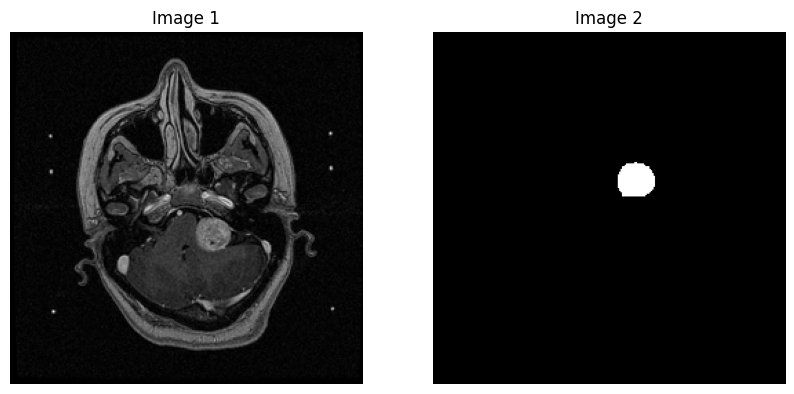

In [88]:
files = sorted(os.listdir(Path))
indx =120

pixelarray = pydicom.dcmread(os.path.join(Path,files[indx]))
pixelarray = pixelarray.pixel_array
import matplotlib.pyplot as plt

fig, axes = plt.subplots(1, 2, figsize=(10, 5))  # Adjust figure size if needed

# indx =34
# print(np.unique(ground_data[:, :, indx]))

# t= 5
# Display first image
axes[0].imshow(pixelarray, cmap="gray")
axes[0].set_title("Image 1")
axes[0].axis("off")  # Hide axes

# Display second image
# slice_data = Perddata[:, :, 30-t]
# Perddata = np.rot90(Perddata, k=1) 
# axes[1].imshow(mask[:, :, indx], cmap="gray")  # Change the index as needed
# axes[1].set_title("Image 2")
# axes[1].axis("off")  # Hide axes

# axes[1].imshow(Perddata[:, :, indx].T, cmap="gray")  # Change the index as needed
# axes[1].set_title("Image 2")
# axes[1].axis("off")  # Hide axes

slice1 = PredData[:, :, indx]
# slice1 = np.rot90(slice1, k=3) 
axes[1].imshow(PredData[:, :,PredData.shape[2]-1- indx],  cmap="gray")
# axes[1].imshow(PredData[:, :,indx],  cmap="gray")
axes[1].set_title("Image 2")
axes[1].axis("off")  # Hide axes

# Perddata


# Show both images
plt.show()


In [566]:
Perddata.shape

(256, 256, 90)

In [16]:
for i in range(0,PredData.shape[2]):
    print(i,":-",np.unique(PredData[:, :, i]))

0 :- [0.]
1 :- [0.]
2 :- [0.]
3 :- [0.]
4 :- [0.]
5 :- [0.]
6 :- [0.]
7 :- [0.]
8 :- [0.]
9 :- [0.]
10 :- [0.]
11 :- [0.]
12 :- [0.]
13 :- [0.]
14 :- [0.]
15 :- [0.]
16 :- [0.]
17 :- [0.]
18 :- [0.]
19 :- [0.]
20 :- [0.]
21 :- [0.]
22 :- [0.]
23 :- [0.]
24 :- [0. 1.]
25 :- [0. 1.]
26 :- [0. 1.]
27 :- [0. 1.]
28 :- [0. 1.]
29 :- [0. 1.]
30 :- [0. 1.]
31 :- [0. 1.]
32 :- [0. 1.]
33 :- [0. 1.]
34 :- [0. 1.]
35 :- [0. 1.]
36 :- [0. 1.]
37 :- [0. 1.]
38 :- [0. 1.]
39 :- [0. 1.]
40 :- [0. 1.]
41 :- [0. 1.]
42 :- [0. 1.]
43 :- [0. 1.]
44 :- [0. 1.]
45 :- [0. 1.]
46 :- [0. 1.]
47 :- [0. 1.]
48 :- [0. 1.]
49 :- [0.]
50 :- [0.]
51 :- [0.]
52 :- [0.]
53 :- [0.]
54 :- [0.]
55 :- [0.]
56 :- [0.]
57 :- [0.]
58 :- [0.]
59 :- [0.]
60 :- [0.]
61 :- [0.]
62 :- [0.]
63 :- [0.]
64 :- [0.]
65 :- [0.]
66 :- [0.]
67 :- [0.]
68 :- [0.]
69 :- [0.]
70 :- [0.]
71 :- [0.]
72 :- [0.]
73 :- [0.]
74 :- [0.]
75 :- [0.]
76 :- [0.]
77 :- [0.]
78 :- [0.]
79 :- [0.]
80 :- [0.]
81 :- [0.]
82 :- [0.]
83 :- [0.]
84 :- [0.]


In [567]:
for i in range(0,Perddata.shape[2]):
    print(i,":-",np.unique(PredData[:, :, i])," ", np.unique(GTData[:, :, i]))

0 :- [0.]   [0.]
1 :- [0.]   [0.]
2 :- [0.]   [0.]
3 :- [0.]   [0.]
4 :- [0.]   [0.]
5 :- [0.]   [0.]
6 :- [0.]   [0.]
7 :- [0.]   [0.]
8 :- [0.]   [0.]
9 :- [0.]   [0.]
10 :- [0.]   [0.]
11 :- [0.]   [0.]
12 :- [0.]   [0.]
13 :- [0.]   [0.]
14 :- [0.]   [0.]
15 :- [0.]   [0.]
16 :- [0.]   [0.]
17 :- [0.]   [0.]
18 :- [0.]   [0. 1.]
19 :- [0. 1.]   [0. 1.]
20 :- [0. 1.]   [0. 1.]
21 :- [0. 1.]   [0. 1.]
22 :- [0. 1.]   [0. 1.]
23 :- [0. 1.]   [0. 1.]
24 :- [0. 1.]   [0. 1.]
25 :- [0. 1.]   [0. 1.]
26 :- [0. 1.]   [0. 1.]
27 :- [0. 1.]   [0. 1.]
28 :- [0. 1.]   [0. 1.]
29 :- [0. 1.]   [0. 1.]
30 :- [0. 1.]   [0. 1.]
31 :- [0.]   [0. 1.]
32 :- [0.]   [0.]
33 :- [0.]   [0.]
34 :- [0.]   [0.]
35 :- [0.]   [0.]
36 :- [0.]   [0.]
37 :- [0.]   [0.]
38 :- [0.]   [0.]
39 :- [0.]   [0.]
40 :- [0.]   [0.]
41 :- [0.]   [0.]
42 :- [0.]   [0.]
43 :- [0.]   [0.]
44 :- [0.]   [0.]
45 :- [0.]   [0.]
46 :- [0.]   [0.]
47 :- [0.]   [0.]
48 :- [0.]   [0.]
49 :- [0.]   [0.]
50 :- [0.]   [0.]
51 :- [0.]   [

In [523]:
import numpy as np

def dice_score(array1: np.ndarray, array2: np.ndarray) -> float:
    """
    Computes the Dice Similarity Coefficient (DSC) between two 3D binary arrays.

    Parameters:
    - array1: np.ndarray (3D binary array)
    - array2: np.ndarray (3D binary array)

    Returns:
    - float: Dice score (between 0 and 1)
    """
    if array1.shape != array2.shape:
        raise ValueError("Input arrays must have the same shape")

    intersection = np.sum(array1 * array2)
    sum_volumes = np.sum(array1) + np.sum(array2)

    if sum_volumes == 0:
        return 1.0  # If both are empty, dice score is 1

    return (2.0 * intersection) / sum_volumes

# Example usage
array1 = Perddata
array2 = GroundSegdata

dice = dice_score(array1, array2)
print(f"Dice Similarity Score: {dice:.4f}")


Dice Similarity Score: 0.9438


In [578]:
AllDiceScores = {}
for UID in DataSeriesUIDs:
    smpl = dfmeta[dfmeta['Series UID'] == UID]['File Location'].tolist()[0][2:]
    smplSeg = dfseg[dfseg['series_instance_uid'] == UID]['SegmentationPath'].tolist()[0]
    if pd.isna(smplSeg):
        continue
    elif smplSeg[-9:] == 'T1.nii.gz':
        Path = os.path.join(DataDir,smpl)
        GroundSegPath = os.path.join(segemntsdir, smplSeg)
        GroundSeg = nib.load(GroundSegPath)
        GroundSegdata = GroundSeg.get_fdata()
        Correctnii = nib.load(CorrectNfityPath)
        OutputFileFolder = 'C:/Users/Rishabh/Documents/DICOMIZER/output'
        output_file = os.path.join(OutputFileFolder, 'vs_gk_0000.nii.gz')
        dicom2nifti.dicom_series_to_nifti(Path, output_file, reorient_nifti=False)
        nii_img = nib.load(output_file)
        data = nii_img.get_fdata()
        data = np.array(data, dtype=np.uint16)
        nii_img = nib.Nifti1Image(data, Correctnii.affine)
        nib.save(nii_img, output_file)
        output_path = os.path.join(OutputFileFolder,"downloaded_file.nii.gz")
        file_path = output_file
        nii_img = nib.load(file_path)
        data = nii_img.get_fdata()
        if GroundSegdata.shape == data.shape:
            with open(file_path, "rb") as file:
                response = requests.post(VSmodelURL, files={"file": file})
            
                # Check if the request was successful
                if response.status_code == 200:
                    # Save the returned file
                    with open(output_path, "wb") as output_file:
                        output_file.write(response.content)
                    print(f"File saved as {output_path}")
                else:
                    print(f"Failed to fetch the file. Status code: {response.status_code}")
                    # print(response.json())  # If the API sends error details
                    
            Perd = nib.load(output_path)
            Perddata = Perd.get_fdata()
            Perddata[Perddata < 0.5] = 0
            Perddata[Perddata >= 0.5] = 1
            GTData = []
            # Assuming GroundSegdata is a 3D NumPy array
            for i in range(GroundSegdata.shape[2]):  # Loop through all slices along the third axis
                GTData.append(np.rot90(GroundSegdata[:, :, i], k=1))
            
            GTData = np.stack(GTData, axis=2)

            PredData = []

            # Assuming GroundSegdata is a 3D NumPy array
            for i in range(Perddata.shape[2]):  # Loop through all slices along the third axis
                PredData.append( Perddata[:, :, i].T )
            
            PredData = np.stack(PredData, axis=2)
            
            for i in range(0,Perddata.shape[2]):
                print(i,":-",np.unique(PredData[:, :, i])," ", np.unique(GTData[:, :, i]))
            
            dice = dice_score(GTData, PredData)
            print(UID,':-',dice)
            AllDiceScores[UID] = dice

File saved as C:/Users/Rishabh/Documents/DICOMIZER/output\downloaded_file.nii.gz
0 :- [0.]   [0.]
1 :- [0.]   [0.]
2 :- [0.]   [0.]
3 :- [0. 1.]   [0. 1.]
4 :- [0. 1.]   [0. 1.]
5 :- [0. 1.]   [0. 1.]
6 :- [0. 1.]   [0. 1.]
7 :- [0. 1.]   [0. 1.]
8 :- [0.]   [0.]
9 :- [0.]   [0.]
10 :- [0.]   [0.]
11 :- [0.]   [0.]
12 :- [0.]   [0.]
13 :- [0.]   [0.]
14 :- [0.]   [0.]
15 :- [0.]   [0.]
16 :- [0.]   [0.]
17 :- [0.]   [0.]
1.3.6.1.4.1.14519.5.2.1.324922141829372870144158925634732261488 :- 0.9446238488219113
File saved as C:/Users/Rishabh/Documents/DICOMIZER/output\downloaded_file.nii.gz
0 :- [0.]   [0.]
1 :- [0.]   [0.]
2 :- [0.]   [0.]
3 :- [0.]   [0.]
4 :- [0.]   [0.]
5 :- [0.]   [0.]
6 :- [0.]   [0.]
7 :- [0.]   [0.]
8 :- [0.]   [0.]
9 :- [0.]   [0.]
10 :- [0.]   [0.]
11 :- [0.]   [0.]
12 :- [0.]   [0. 1.]
13 :- [0. 1.]   [0. 1.]
14 :- [0. 1.]   [0. 1.]
15 :- [0. 1.]   [0. 1.]
16 :- [0. 1.]   [0. 1.]
17 :- [0. 1.]   [0. 1.]
18 :- [0. 1.]   [0. 1.]
19 :- [0. 1.]   [0. 1.]
20 :- [0. 1.]

IndexError: index 64 is out of bounds for axis 2 with size 64

In [580]:
finaldic = 0
for key in AllDiceScores.keys():
    print(AllDiceScores[key])
    finaldic = finaldic + AllDiceScores[key]


0.9446238488219113
0.9313978494623656
0.0
0.8601366742596811
0.9658795533589603
0.76734524304113
0.9169360294670376
0.8806346916696718
0.0
0.8358283433133733
0.8907563025210085
0.7105831533477321
0.9319089241394194
0.8896513862201483
0.7726597325408618
0.9197125898156826
0.839542922988285
0.8836045056320401
0.9319349315068494
0.933984559634473
0.9143214509068167
0.9250363901018923
0.9014430457476205
0.925845932325414
0.8554744525547445
0.9393709738537325
0.92497320471597
0.777292576419214


In [581]:
finaldic = finaldic/len( AllDiceScores.keys())

In [582]:
finaldic

np.float64(0.8203885452987869)